ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #4
 
=====  ЧАСТЬ 3  =====
Применить алгоритм сегментации watershed+distance transform 
для задачи подсчета пальмовых деревьев.
--------------------------------------------------------------------------------
ОТВЕТ: Количество найденных деревьев: 738


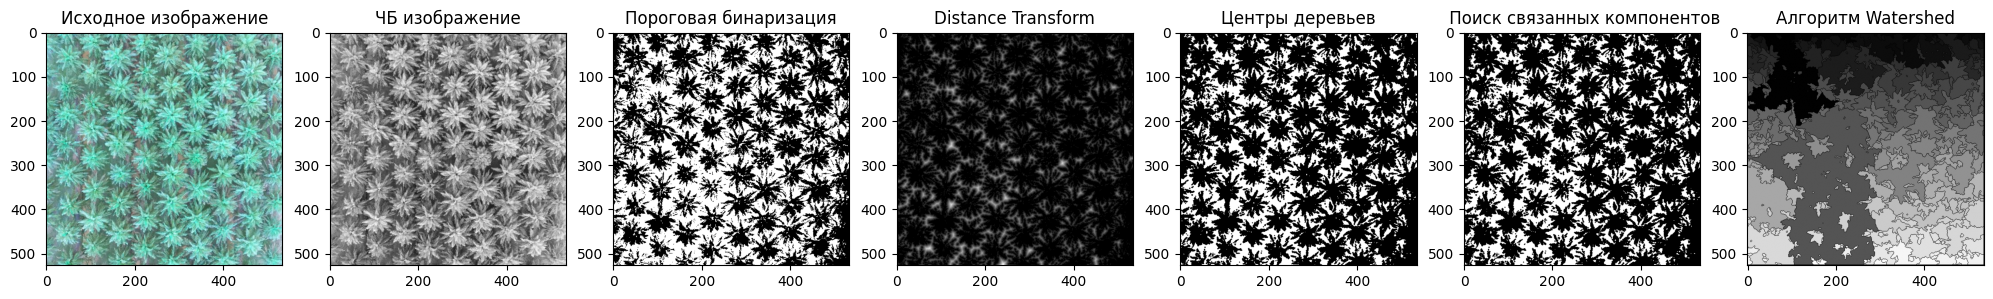

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("="*50)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #4")
print("="*50)
print(" ")

###2 ЗАДАНИЕ : Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.
print("="*5, " ЧАСТЬ 3 ", "="*5)
print("Применить алгоритм сегментации watershed+distance transform \nдля задачи подсчета пальмовых деревьев.")
print("-"*80)


def segment_watershed(image_path):
    # Загружаем изображение
    image = cv2.imread(image_path)
    plt.figure(figsize=(25, 8))
    plt.subplot(1, 7, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Исходное изображение")

    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 7, 2)
    plt.imshow(image_gray, cmap='gray')
    plt.title("ЧБ изображение")

    # Пороговая бинаризация (Otsu + инверсия)
    ret, thresh = cv2.threshold(image_gray,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    plt.subplot(1, 7, 3)
    plt.imshow(thresh, cmap='gray')
    plt.title("Пороговая бинаризация")

    # Distance Transform
    dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
    plt.subplot(1, 7, 4)
    plt.imshow(dist, cmap='gray')
    plt.title("Distance Transform")

    # Выделение "точных объектов" (центры деревьев)
    ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
    plt.subplot(1, 7, 5)
    plt.imshow(sure_fg, cmap='gray')
    plt.title("Центры деревьев")

    # Поиск связанных компонентов (затравки)
    sure_fg = sure_fg.astype(np.uint8)
    ret, markers = cv2.connectedComponents(sure_fg)
    plt.subplot(1, 7, 6)
    plt.imshow(sure_fg, cmap='gray')
    plt.title(" Поиск связанных компонентов")

    # Алгоритм Watershed
    markers = cv2.watershed(image, markers)
    plt.subplot(1, 7, 7)
    plt.imshow(markers, cmap='gray')
    plt.title("Алгоритм Watershed")
    return image, markers


def count_trees(markers):
    # Находим уникальные метки
    unique_markers = np.unique(markers)
    object_markers = [m for m in unique_markers if m > 1]
    tree_count = len(object_markers)
    print("ОТВЕТ: Количество найденных деревьев:", tree_count)

    return tree_count



image, markers = segment_watershed("palm_1.JPG")
count = count_trees(markers)
